In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Daniel_1", "'third', 'year', 'reign', 'jehoiakim', 'king', 'judah', 'came', 'nebuchadnezzar', 'king', 'babylon', 'jerusalem', ',', 'besieged', 'it.and', 'lord', 'gave', 'jehoiakim', 'king', 'judah', 'hand', ',', 'part', 'vessels', 'house', 'god', ':', 'carried', 'land', 'shinar', 'house', 'god', ';', 'brought', 'vessels', 'treasure', 'house', 'god.and', 'king', 'spoke', 'ashpenaz', 'master', 'eunuchs', ',', 'bring', 'certain', 'children', 'israel', ',', 'king', ', 'seed', ',', 'princes', ';', 'children', 'blemish', ',', 'well', 'favored', ',', 'skillful', 'wisdom', ',', 'cunning', 'knowledge', ',', 'understanding', 'science', ',', 'ability', 'stand', 'king', ', 'palace', ',', 'might', 'teach', 'learning', 'tongue', 'chaldeans.and', 'king', 'appointed', 'daily', 'provision', 'king', ', 'meat', ',', 'wine', 'drank', ':', 'nourishing', 'three', 'years', ',', 'end', 'thereof', 'might', 'stand', 'king.now', 'among', 'children', 'judah', ',', 'daniel', ',', 'hananiah', ',', 'mishael', ',', 'azariah', ':', 'prince', 'eunuchs', 'gave', 'names', ':', 'gave', 'daniel', 'name', 'belteshazzar', ';', 'hananiah', ',', 'shadrach', ';', 'mishael', ',', 'meshach', ';', 'azariah', ',', 'abednego.but', 'daniel', 'purposed', 'heart', 'would', 'defile', 'portion', 'king', ', 'meat', ',', 'wine', 'drank', ':', 'therefore', 'requested', 'prince', 'eunuchs', 'might', 'defile', 'himself.now', 'god', 'brought', 'daniel', 'favor', 'tender', 'love', 'prince', 'eunuchs.and', 'prince', 'eunuchs', 'said', 'daniel', ',', 'fear', 'lord', 'king', ',', 'appointed', 'meat', 'drink', ':', 'see', 'faces', 'worse', 'liking', 'children', 'sort', '?', 'shall', 'make', 'endanger', 'head', 'king.then', 'said', 'daniel', 'melzar', ',', 'prince', 'eunuchs', 'set', 'daniel', ',', 'hananiah', ',', 'mishael', ',', 'azariah', ',', 'prove', 'servants', ',', 'beseech', ',', 'ten', 'days', ';', 'let', 'give', 'us', 'vegetables', 'eat', ',', 'water', 'drink.then', 'let', 'countenances', 'looked', ',', 'countenance', 'children', 'eat', 'portion', 'king', ', 'meat', ':', 'see', ',', 'deal', 'servants.so', 'consented', 'matter', ',', 'proved', 'ten', 'days.and', 'end', 'ten', 'days', 'countenances', 'appeared', 'fairer', 'fatter', 'flesh', 'children', 'eat', 'portion', 'king', ', 'meat.thus', 'melzar', 'took', 'away', 'portion', 'meat', ',', 'wine', 'drink', ';', 'gave', 'vegetables.as', 'four', 'children', ',', 'god', 'gave', 'knowledge', 'skill', 'learning', 'wisdom', ':', 'daniel', 'understanding', 'visions', 'dreams.now', 'end', 'days', 'king', 'said', 'bring', ',', 'prince', 'eunuchs', 'brought', 'nebuchadnezzar.and', 'king', 'communed', ';', 'among', 'found', 'none', 'like', 'daniel', ',', 'hananiah', ',', 'mishael', ',', 'azariah', ':', 'therefore', 'stood', 'king.and', 'matters', 'wisdom', 'understanding', ',', 'king', 'inquired', ',', 'found', 'ten', 'times', 'better', 'magicians', 'astrologers', 'realm.and', 'daniel', 'continued', 'even', 'first', 'year', 'king', 'cyrus', '.'"],
               ["Daniel_2", "'second', 'year', 'reign', 'nebuchadnezzar', 'nebuchadnezzar', 'dreamed', 'dreams', ',', 'spirit', 'troubled', ',', 'sleep', 'broke', 'him.then', 'king', 'commanded', 'call', 'magicians', ',', 'astrologers', ',', 'sorcerers', ',', 'chaldeans', ',', 'show', 'king', 'dreams', '.', 'came', 'stood', 'king.and', 'king', 'said', ',', 'dreamed', 'dream', ',', 'spirit', 'troubled', 'know', 'dream.then', 'spoke', 'chaldeans', 'king', 'syriack', ',', 'king', ',', 'live', 'ever', ':', 'tell', 'servants', 'dream', ',', 'show', 'interpretation.the', 'king', 'answered', 'said', 'chaldeans', ',', 'thing', 'gone', ':', 'make', 'known', 'dream', ',', 'interpretation', 'thereof', ',', 'shall', 'cut', 'pieces', ',', 'houses', 'shall', 'made', 'dunghillbut', 'show', 'dream', ',', 'interpretation', 'thereof', ',', 'shall', 'receive', 'gifts', 'rewards', 'great', 'honor', ':', 'therefore', 'show', 'dream', ',', 'interpretation', 'thereof.they', 'answered', 'said', ',', 'let', 'king', 'tell', 'servants', 'dream', ',', 'show', 'interpretation', 'it.the', 'king', 'answered', 'said', ',', 'know', 'certainty', 'would', 'gain', 'time', ',', 'see', 'thing', 'gone', 'me.but', 'make', 'known', 'dream', ',', 'one', 'decree', ':', 'prepared', 'lying', 'corrupt', 'words', 'speak', ',', 'till', 'time', 'changed', ':', 'therefore', 'tell', 'dream', ',', 'shall', 'know', 'show', 'interpretation', 'thereof.the', 'chaldeans', 'answered', 'king', ',', 'said', ',', 'man', 'earth', 'show', 'king', ', 'matter', ':', 'therefore', 'king', ',', 'lord', ',', 'ruler', ',', 'asked', 'things', 'magician', ',', 'astrologer', ',', 'chaldean.and', 'rare', 'thing', 'king', 'requires', ',', 'none', 'show', 'king', ',', 'except', 'gods', ',', 'whose', 'dwelling', 'flesh.for', 'cause', 'king', 'angry', 'furious', ',', 'commanded', 'destroy', 'wise', 'men', 'babylon.and', 'decree', 'went', 'forth', 'wise', 'men', 'slain', ';', 'sought', 'daniel', 'fellows', 'slain.then', 'daniel', 'answered', 'counsel', 'wisdom', 'arioch', 'captain', 'king', ', 'guard', ',', 'gone', 'forth', 'slay', 'wise', 'men', 'babylon', ':', 'answered', 'said', 'arioch', 'king', ', 'captain', ',', 'decree', 'hasty', 'king', '?', 'arioch', 'made', 'thing', 'known', 'daniel.then', 'daniel', 'went', ',', 'desired', 'king', 'would', 'give', 'time', ',', 'would', 'show', 'king', 'interpretation.then', 'daniel', 'went', 'house', ',', 'made', 'thing', 'known', 'hananiah', ',', 'mishael', ',', 'azariah', ',', 'companions', ':', 'would', 'desire', 'mercies', 'god', 'heaven', 'concerning', 'secret', ';', 'daniel', 'fellows', 'perish', 'rest', 'wise', 'men', 'babylon.then', 'secret', 'revealed', 'daniel', 'night', 'vision', '.', 'daniel', 'blessed', 'god', 'heaven.daniel', 'answered', 'said', ',', 'blessed', 'name', 'god', 'ever', 'ever', ':', 'wisdom', 'might', ':', 'changes', 'times', 'seasons', ':', 'removes', 'kings', ',', 'sets', 'kings', ':', 'gives', 'wisdom', 'wise', ',', 'knowledge', 'know', 'understanding', ':', 'reveals', 'deep', 'secret', 'things', ':', 'knows', 'darkness', ',', 'light', 'dwells', 'him.i', 'thank', ',', 'praise', ',', 'god', 'fathers', ',', 'given', 'wisdom', 'might', ',', 'made', 'known', 'desired', ':', 'made', 'known', 'us', 'king', ', 'matter.therefore', 'daniel', 'went', 'arioch', ',', 'king', 'ordained', 'destroy', 'wise', 'men', 'babylon', ':', 'went', 'said', 'thus', ';', 'destroy', 'wise', 'men', 'babylon', ':', 'bring', 'king', ',', 'show', 'king', 'interpretation.then', 'arioch', 'brought', 'daniel', 'king', 'haste', ',', 'said', 'thus', ',', 'found', 'man', 'captives', 'judah', ',', 'make', 'known', 'king', 'interpretation.the', 'king', 'answered', 'said', 'daniel', ',', 'whose', 'name', 'belteshazzar', ',', 'able', 'make', 'known', 'dream', 'seen', ',', 'interpretation', 'thereof', '?', 'daniel', 'answered', 'presence', 'king', ',', 'said', ',', 'secret', 'king', 'demanded', 'wise', 'men', ',', 'astrologers', ',', 'magicians', ',', 'soothsayers', ',', 'show', 'king', ';', 'god', 'heaven', 'reveals', 'secrets', ',', 'makes', 'known', 'king', 'nebuchadnezzar', 'shall', 'latter', 'days', '.', 'dream', ',', 'visions', 'head', 'bed', ',', ';', ',', 'king', ',', 'thoughts', 'came', 'mind', 'bed', ',', 'come', 'pass', 'hereafter', ':', 'reveals', 'secrets', 'makes', 'known', 'shall', 'come', 'pass.but', ',', 'secret', 'revealed', 'wisdom', 'living', ',', 'sakes', 'shall', 'make', 'known', 'interpretation', 'king', ',', 'might', 'know', 'thoughts', 'heart.you', ',', 'king', ',', 'saw', ',', 'behold', 'great', 'image', '.', 'great', 'image', ',', 'whose', 'brightness', 'excellent', ',', 'stood', ';', 'form', 'thereof', 'terrible.this', 'image', ', 'head', 'fine', 'gold', ',', 'breast', 'arms', 'silver', ',', 'belly', 'thighs', 'brass', ',', 'legs', 'iron', ',', 'feet', 'part', 'iron', 'part', 'clay.you', 'saw', 'till', 'stone', 'cut', 'without', 'hands', ',', 'smote', 'image', 'feet', 'iron', 'clay', ',', 'broke', 'pieces.then', 'iron', ',', 'clay', ',', 'brass', ',', 'silver', ',', 'gold', ',', 'broken', 'pieces', 'together', ',', 'became', 'like', 'chaff', 'summer', 'threshing', 'floors', ';', 'wind', 'carried', 'away', ',', 'place', 'found', ':', 'stone', 'smote', 'image', 'became', 'great', 'mountain', ',', 'filled', 'whole', 'earth.this', 'dream', ';', 'tell', 'interpretation', 'thereof', 'king.you', ',', 'king', ',', 'king', 'kings', ':', 'god', 'heaven', 'given', 'kingdom', ',', 'power', ',', 'strength', ',', 'glory.and', 'wherever', 'children', 'men', 'dwell', ',', 'beasts', 'field', 'fowls', 'heaven', 'given', 'hand', ',', 'made', 'ruler', '.', 'head', 'gold.and', 'shall', 'arise', 'another', 'kingdom', 'inferior', ',', 'another', 'third', 'kingdom', 'brass', ',', 'shall', 'bear', 'rule', 'earth.and', 'fourth', 'kingdom', 'shall', 'strong', 'iron', ':', 'much', 'iron', 'breaks', 'pieces', 'subdues', 'things', ':', 'iron', 'breaks', ',', 'shall', 'break', 'pieces', 'bruise.and', 'whereas', 'saw', 'feet', 'toes', ',', 'part', potters'clay, ',', 'part', 'iron', ',', 'kingdom', 'shall', 'divided', ';', 'shall', 'strength', 'iron', ',', 'much', 'saw', 'iron', 'mixed', 'miry', 'clay.and', 'toes', 'feet', 'part', 'iron', ',', 'part', 'clay', ',', 'kingdom', 'shall', 'partly', 'strong', ',', 'partly', 'broken.and', 'whereas', 'saw', 'iron', 'mixed', 'miry', 'clay', ',', 'shall', 'mingle', 'seed', 'men', ':', 'shall', 'join', 'one', 'another', ',', 'even', 'iron', 'mixed', 'clay.and', 'days', 'kings', 'shall', 'god', 'heaven', 'set', 'kingdom', ',', 'shall', 'never', 'destroyed', ':', 'kingdom', 'shall', 'left', 'people', ',', 'shall', 'break', 'pieces', 'consume', 'kingdoms', ',', 'shall', 'stand', 'ever.for', 'much', 'saw', 'stone', 'cut', 'mountain', 'without', 'hands', ',', 'broke', 'pieces', 'iron', ',', 'brass', ',', 'clay', ',', 'silver', ',', 'gold', ';', 'great', 'god', 'made', 'known', 'king', 'shall', 'come', 'pass', 'hereafter', ':', 'dream', 'certain', ',', 'interpretation', 'thereof', 'sure.then', 'king', 'nebuchadnezzar', 'fell', 'face', ',', 'worshipped', 'daniel', ',', 'commanded', 'offer', 'oblation', 'sweet', 'odors', 'him.the', 'king', 'answered', 'daniel', ',', 'said', ',', 'truth', ',', 'god', 'god', 'gods', ',', 'lord', 'kings', ',', 'revealer', 'secrets', ',', 'seeing', 'could', 'reveal', 'secret.then', 'king', 'made', 'daniel', 'great', 'man', ',', 'gave', 'many', 'great', 'gifts', ',', 'made', 'ruler', 'whole', 'province', 'babylon', ',', 'chief', 'governors', 'wise', 'men', 'babylon.then', 'daniel', 'requested', 'king', ',', 'set', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'affairs', 'province', 'babylon', ':', 'daniel', 'sat', 'gate', 'king', '.'"],
               ["Daniel_3", "'nebuchadnezzar', 'king', 'made', 'image', 'gold', ',', 'whose', 'height', 'three', 'score', 'cubits', ',', 'breadth', 'thereof', 'six', 'cubits', ':', 'set', 'plain', 'dura', ',', 'province', 'babylon.then', 'nebuchadnezzar', 'king', 'sent', 'gather', 'together', 'princes', ',', 'governors', ',', 'captains', ',', 'judges', ',', 'treasurers', ',', 'counsellors', ',', 'sheriffs', ',', 'rulers', 'provinces', ',', 'come', 'dedication', 'image', 'nebuchadnezzar', 'king', 'set', 'up.then', 'princes', ',', 'governors', ',', 'captains', ',', 'judges', ',', 'treasurers', ',', 'counsellors', ',', 'sheriffs', ',', 'rulers', 'provinces', ',', 'gathered', 'together', 'dedication', 'image', 'nebuchadnezzar', 'king', 'set', ';', 'stood', 'image', 'nebuchadnezzar', 'set', 'up.then', 'herald', 'cried', 'aloud', ',', 'commanded', ',', 'people', ',', 'nations', ',', 'languages', ',', 'time', 'hear', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'dulcimer', ',', 'kinds', 'music', ',', 'fall', 'worship', 'golden', 'image', 'nebuchadnezzar', 'king', 'set', ':', 'whoever', 'falls', 'worships', 'shall', 'hour', 'cast', 'middle', 'burning', 'fiery', 'furnace.therefore', 'time', ',', 'people', 'heard', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'kinds', 'music', ',', 'people', ',', 'nations', ',', 'languages', ',', 'fell', 'worshipped', 'golden', 'image', 'nebuchadnezzar', 'king', 'set', 'up.why', 'time', 'certain', 'chaldeans', 'came', 'near', ',', 'accused', 'jews.they', 'spoke', 'said', 'king', 'nebuchadnezzar', ',', 'king', ',', 'live', 'ever.you', ',', 'king', ',', 'made', 'decree', ',', 'every', 'man', 'shall', 'hear', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'dulcimer', ',', 'kinds', 'music', ',', 'shall', 'fall', 'worship', 'golden', 'image', ':', 'whoever', 'falls', 'worships', ',', 'cast', 'middle', 'burning', 'fiery', 'furnace.there', 'certain', 'jews', 'set', 'affairs', 'province', 'babylon', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ';', 'men', ',', 'king', ',', 'regarded', ':', 'serve', 'gods', ',', 'worship', 'golden', 'image', 'set', 'up.then', 'nebuchadnezzar', 'rage', 'fury', 'commanded', 'bring', 'shadrach', ',', 'meshach', ',', 'abednego', '.', 'brought', 'men', 'king.nebuchadnezzar', 'spoke', 'said', ',', 'true', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'serve', 'gods', ',', 'worship', 'golden', 'image', 'set', '?', 'ready', 'time', 'hear', 'sound', 'cornet', ',', 'flute', ',', 'harp', ',', 'sackbut', ',', 'psaltery', ',', 'dulcimer', ',', 'kinds', 'music', ',', 'fall', 'worship', 'image', 'made', ';', 'well', ':', 'worship', ',', 'shall', 'cast', 'hour', 'middle', 'burning', 'fiery', 'furnace', ';', 'god', 'shall', 'deliver', 'hands', '?', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'answered', 'said', 'king', ',', 'nebuchadnezzar', ',', 'careful', 'answer', 'matter.if', ',', 'god', 'serve', 'able', 'deliver', 'us', 'burning', 'fiery', 'furnace', ',', 'deliver', 'us', 'hand', ',', 'king.but', ',', 'known', ',', 'king', ',', 'serve', 'gods', ',', 'worship', 'golden', 'image', 'set', 'up.then', 'nebuchadnezzar', 'full', 'fury', ',', 'form', 'visage', 'changed', 'shadrach', ',', 'meshach', ',', 'abednego', ':', 'therefore', 'spoke', ',', 'commanded', 'heat', 'furnace', 'one', 'seven', 'times', 'wont', 'heated.and', 'commanded', 'mighty', 'men', 'army', 'bind', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'cast', 'burning', 'fiery', 'furnace.then', 'men', 'bound', 'coats', ',', 'hosen', ',', 'hats', ',', 'garments', ',', 'cast', 'middle', 'burning', 'fiery', 'furnace.therefore', 'king', ', 'commandment', 'urgent', ',', 'furnace', 'exceeding', 'hot', ',', 'flames', 'fire', 'slew', 'men', 'took', 'shadrach', ',', 'meshach', ',', 'abednego.and', 'three', 'men', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'fell', 'bound', 'middle', 'burning', 'fiery', 'furnace.then', 'nebuchadnezzar', 'king', 'astonished', ',', 'rose', 'haste', ',', 'spoke', ',', 'said', 'counsellors', ',', 'cast', 'three', 'men', 'bound', 'middle', 'fire', '?', 'answered', 'said', 'king', ',', 'true', ',', 'king.he', 'answered', 'said', ',', 'see', ',', 'see', 'four', 'men', 'loose', ',', 'walking', 'middle', 'fire', ',', 'hurt', ';', 'form', 'fourth', 'like', 'son', 'god.then', 'nebuchadnezzar', 'came', 'near', 'mouth', 'burning', 'fiery', 'furnace', ',', 'spoke', ',', 'said', ',', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'servants', 'high', 'god', ',', 'come', 'forth', ',', 'come', '.', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'came', 'forth', 'middle', 'fire.and', 'princes', ',', 'governors', ',', 'captains', ',', 'king', ', 'counsellors', ',', 'gathered', 'together', ',', 'saw', 'men', ',', 'whose', 'bodies', 'fire', 'power', ',', 'hair', 'head', 'singed', ',', 'neither', 'coats', 'changed', ',', 'smell', 'fire', 'passed', 'them.then', 'nebuchadnezzar', 'spoke', ',', 'said', ',', 'blessed', 'god', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'sent', 'angel', ',', 'delivered', 'servants', 'trusted', ',', 'changed', 'king', ', 'word', ',', 'yielded', 'bodies', ',', 'might', 'serve', 'worship', 'god', ',', 'except', 'god.therefore', 'make', 'decree', ',', 'every', 'people', ',', 'nation', ',', 'language', ',', 'speak', 'thing', 'amiss', 'god', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'shall', 'cut', 'pieces', ',', 'houses', 'shall', 'made', 'dunghill', ':', 'god', 'deliver', 'sort.then', 'king', 'promoted', 'shadrach', ',', 'meshach', ',', 'abednego', ',', 'province', 'babylon', '.'"],
               ["Daniel_4", "'nebuchadnezzar', 'king', ',', 'people', ',', 'nations', ',', 'languages', ',', 'dwell', 'earth', ';', 'peace', 'multiplied', 'you.i', 'thought', 'good', 'show', 'signs', 'wonders', 'high', 'god', 'worked', 'toward', 'me.how', 'great', 'signs', '!', 'mighty', 'wonders', '!', 'kingdom', 'everlasting', 'kingdom', ',', 'dominion', 'generation', 'generation.i', 'nebuchadnezzar', 'rest', 'house', ',', 'flourishing', 'palace', ':', 'saw', 'dream', 'made', 'afraid', ',', 'thoughts', 'bed', 'visions', 'head', 'troubled', 'me.therefore', 'made', 'decree', 'bring', 'wise', 'men', 'babylon', ',', 'might', 'make', 'known', 'interpretation', 'dream.then', 'came', 'magicians', ',', 'astrologers', ',', 'chaldeans', ',', 'soothsayers', ':', 'told', 'dream', ';', 'make', 'known', 'interpretation', 'thereof.but', 'last', 'daniel', 'came', ',', 'whose', 'name', 'belteshazzar', ',', 'according', 'name', 'god', ',', 'spirit', 'holy', 'gods', ':', 'told', 'dream', ',', 'saying', ',', 'belteshazzar', ',', 'master', 'magicians', ',', 'know', 'spirit', 'holy', 'gods', ',', 'secret', 'troubles', ',', 'tell', 'visions', 'dream', 'seen', ',', 'interpretation', 'thereof.thus', 'visions', 'head', 'bed', ';', 'saw', ',', 'behold', 'tree', 'middle', 'earth', ',', 'height', 'thereof', 'great.the', 'tree', 'grew', ',', 'strong', ',', 'height', 'thereof', 'reached', 'heaven', ',', 'sight', 'thereof', 'end', 'earth', ':', 'leaves', 'thereof', 'fair', ',', 'fruit', 'thereof', 'much', ',', 'meat', ':', 'beasts', 'field', 'shadow', ',', 'fowls', 'heaven', 'dwelled', 'boughs', 'thereof', ',', 'flesh', 'fed', 'it.i', 'saw', 'visions', 'head', 'bed', ',', ',', 'behold', ',', 'watcher', 'holy', 'one', 'came', 'heaven', ';', 'cried', 'aloud', ',', 'said', 'thus', ',', 'hew', 'tree', ',', 'cut', 'branches', ',', 'shake', 'leaves', ',', 'scatter', 'fruit', ':', 'let', 'beasts', 'get', 'away', ',', 'fowls', 'branches', ':', 'nevertheless', 'leave', 'stump', 'roots', 'earth', ',', 'even', 'band', 'iron', 'brass', ',', 'tender', 'grass', 'field', ';', 'let', 'wet', 'dew', 'heaven', ',', 'let', 'portion', 'beasts', 'grass', 'earth', ':', 'let', 'heart', 'changed', 'man', ', ',', 'let', 'beast', ', 'heart', 'given', ';', 'let', 'seven', 'times', 'pass', 'him.this', 'matter', 'decree', 'watchers', ',', 'demand', 'word', 'holy', 'ones', ':', 'intent', 'living', 'may', 'know', 'high', 'rules', 'kingdom', 'men', ',', 'gives', 'whomsoever', ',', 'sets', 'basest', 'men.this', 'dream', 'king', 'nebuchadnezzar', 'seen', '.', ',', 'belteshazzar', ',', 'declare', 'interpretation', 'thereof', ',', 'much', 'wise', 'men', 'kingdom', 'able', 'make', 'known', 'interpretation', ':', 'able', ';', 'spirit', 'holy', 'gods', 'you.then', 'daniel', ',', 'whose', 'name', 'belteshazzar', ',', 'astonished', 'one', 'hour', ',', 'thoughts', 'troubled', '.', 'king', 'spoke', ',', 'said', ',', 'belteshazzar', ',', 'let', 'dream', ',', 'interpretation', 'thereof', ',', 'trouble', '.', 'belteshazzar', 'answered', 'said', ',', 'lord', ',', 'dream', 'hate', ',', 'interpretation', 'thereof', 'enemies.the', 'tree', 'saw', ',', 'grew', ',', 'strong', ',', 'whose', 'height', 'reached', 'heaven', ',', 'sight', 'thereof', 'earth', ';', 'whose', 'leaves', 'fair', ',', 'fruit', 'thereof', 'much', ',', 'meat', ';', 'beasts', 'field', 'dwelled', ',', 'whose', 'branches', 'fowls', 'heaven', 'habitation', ':', ',', 'king', ',', 'grown', 'become', 'strong', ':', 'greatness', 'grown', ',', 'reaches', 'heaven', ',', 'dominion', 'end', 'earth.and', 'whereas', 'king', 'saw', 'watcher', 'holy', 'one', 'coming', 'heaven', ',', 'saying', ',', 'hew', 'tree', ',', 'destroy', ';', 'yet', 'leave', 'stump', 'roots', 'thereof', 'earth', ',', 'even', 'band', 'iron', 'brass', ',', 'tender', 'grass', 'field', ';', 'let', 'wet', 'dew', 'heaven', ',', 'let', 'portion', 'beasts', 'field', ',', 'till', 'seven', 'times', 'pass', ';', 'interpretation', ',', 'king', ',', 'decree', 'high', ',', 'come', 'lord', 'king', ':', 'shall', 'drive', 'men', ',', 'dwelling', 'shall', 'beasts', 'field', ',', 'shall', 'make', 'eat', 'grass', 'oxen', ',', 'shall', 'wet', 'dew', 'heaven', ',', 'seven', 'times', 'shall', 'pass', ',', 'till', 'know', 'high', 'rules', 'kingdom', 'men', ',', 'gives', 'whomsoever', 'will.and', 'whereas', 'commanded', 'leave', 'stump', 'tree', 'roots', ';', 'kingdom', 'shall', 'sure', ',', 'shall', 'known', 'heavens', 'rule.why', ',', 'king', ',', 'let', 'counsel', 'acceptable', ',', 'break', 'sins', 'righteousness', ',', 'iniquities', 'showing', 'mercy', 'poor', ';', 'may', 'lengthening', 'tranquility.all', 'came', 'king', 'nebuchadnezzar.at', 'end', 'twelve', 'months', 'walked', 'palace', 'kingdom', 'babylon.the', 'king', 'spoke', ',', 'said', ',', 'great', 'babylon', ',', 'built', 'house', 'kingdom', 'might', 'power', ',', 'honor', 'majesty', '?', 'word', 'king', ', 'mouth', ',', 'fell', 'voice', 'heaven', ',', 'saying', ',', 'king', 'nebuchadnezzar', ',', 'spoken', ';', 'kingdom', 'departed', 'you.and', 'shall', 'drive', 'men', ',', 'dwelling', 'shall', 'beasts', 'field', ':', 'shall', 'make', 'eat', 'grass', 'oxen', ',', 'seven', 'times', 'shall', 'pass', ',', 'know', 'high', 'rules', 'kingdom', 'men', ',', 'gives', 'whomsoever', 'will.the', 'hour', 'thing', 'fulfilled', 'nebuchadnezzar', ':', 'driven', 'men', ',', 'eat', 'grass', 'oxen', ',', 'body', 'wet', 'dew', 'heaven', ',', 'till', 'hairs', 'grown', 'like', eagles'feathers, ',', 'nails', 'like', birds'claws.and, 'end', 'days', 'nebuchadnezzar', 'lifted', 'eyes', 'heaven', ',', 'understanding', 'returned', ',', 'blessed', 'high', ',', 'praised', 'honored', 'lives', 'ever', ',', 'whose', 'dominion', 'everlasting', 'dominion', ',', 'kingdom', 'generation', 'generation', ':', 'inhabitants', 'earth', 'reputed', 'nothing', ':', 'according', 'army', 'heaven', ',', 'among', 'inhabitants', 'earth', ':', 'none', 'stay', 'hand', ',', 'say', ',', '?', 'time', 'reason', 'returned', ';', 'glory', 'kingdom', ',', 'honor', 'brightness', 'returned', ';', 'counsellors', 'lords', 'sought', ';', 'established', 'kingdom', ',', 'excellent', 'majesty', 'added', 'me.now', 'nebuchadnezzar', 'praise', 'extol', 'honor', 'king', 'heaven', ',', 'whose', 'works', 'truth', ',', 'ways', 'judgment', ':', 'walk', 'pride', 'able', 'abase', '.'"],
               ["Daniel_5", "'belshazzar', 'king', 'made', 'great', 'feast', 'thousand', 'lords', ',', 'drank', 'wine', 'thousand.belshazzar', ',', 'whiles', 'tasted', 'wine', ',', 'commanded', 'bring', 'golden', 'silver', 'vessels', 'father', 'nebuchadnezzar', 'taken', 'temple', 'jerusalem', ';', 'king', ',', 'princes', ',', 'wives', ',', 'concubines', ',', 'might', 'drink', 'therein.then', 'brought', 'golden', 'vessels', 'taken', 'temple', 'house', 'god', 'jerusalem', ';', 'king', ',', 'princes', ',', 'wives', ',', 'concubines', ',', 'drank', 'them.they', 'drank', 'wine', ',', 'praised', 'gods', 'gold', ',', 'silver', ',', 'brass', ',', 'iron', ',', 'wood', ',', 'stone.in', 'hour', 'came', 'forth', 'fingers', 'man', ', 'hand', ',', 'wrote', 'candlestick', 'plaster', 'wall', 'king', ', 'palace', ':', 'king', 'saw', 'part', 'hand', 'wrote.then', 'king', ', 'countenance', 'changed', ',', 'thoughts', 'troubled', ',', 'joints', 'loins', 'loosed', ',', 'knees', 'smote', 'one', 'another.the', 'king', 'cried', 'aloud', 'bring', 'astrologers', ',', 'chaldeans', ',', 'soothsayers', '.', 'king', 'spoke', ',', 'said', 'wise', 'men', 'babylon', ',', 'whoever', 'shall', 'read', 'writing', ',', 'show', 'interpretation', 'thereof', ',', 'shall', 'clothed', 'scarlet', ',', 'chain', 'gold', 'neck', ',', 'shall', 'third', 'ruler', 'kingdom.then', 'came', 'king', ', 'wise', 'men', ':', 'could', 'read', 'writing', ',', 'make', 'known', 'king', 'interpretation', 'thereof.then', 'king', 'belshazzar', 'greatly', 'troubled', ',', 'countenance', 'changed', ',', 'lords', 'astonished.now', 'queen', 'reason', 'words', 'king', 'lords', 'came', 'banquet', 'house', ':', 'queen', 'spoke', 'said', ',', 'king', ',', 'live', 'ever', ':', 'let', 'thoughts', 'trouble', ',', 'let', 'countenance', 'changed', ':', 'man', 'kingdom', ',', 'spirit', 'holy', 'gods', ';', 'days', 'father', 'light', 'understanding', 'wisdom', ',', 'like', 'wisdom', 'gods', ',', 'found', ';', 'king', 'nebuchadnezzar', 'father', ',', 'king', ',', 'say', ',', 'father', ',', 'made', 'master', 'magicians', ',', 'astrologers', ',', 'chaldeans', ',', 'soothsayers', ';', 'much', 'excellent', 'spirit', ',', 'knowledge', ',', 'understanding', ',', 'interpreting', 'dreams', ',', 'showing', 'hard', 'sentences', ',', 'dissolving', 'doubts', ',', 'found', 'daniel', ',', 'king', 'named', 'belteshazzar', ':', 'let', 'daniel', 'called', ',', 'show', 'interpretation.then', 'daniel', 'brought', 'king', '.', 'king', 'spoke', 'said', 'daniel', ',', 'daniel', ',', 'children', 'captivity', 'judah', ',', 'king', 'father', 'brought', 'jewry', '?', 'even', 'heard', ',', 'spirit', 'gods', ',', 'light', 'understanding', 'excellent', 'wisdom', 'found', 'you.and', 'wise', 'men', ',', 'astrologers', ',', 'brought', ',', 'read', 'writing', ',', 'make', 'known', 'interpretation', 'thereof', ':', 'could', 'show', 'interpretation', 'thing', ':', 'heard', ',', 'make', 'interpretations', ',', 'dissolve', 'doubts', ':', 'read', 'writing', ',', 'make', 'known', 'interpretation', 'thereof', ',', 'shall', 'clothed', 'scarlet', ',', 'chain', 'gold', 'neck', ',', 'shall', 'third', 'ruler', 'kingdom.then', 'daniel', 'answered', 'said', 'king', ',', 'let', 'gifts', ',', 'give', 'rewards', 'another', ';', 'yet', 'read', 'writing', 'king', ',', 'make', 'known', 'interpretation.o', 'king', ',', 'high', 'god', 'gave', 'nebuchadnezzar', 'father', 'kingdom', ',', 'majesty', ',', 'glory', ',', 'honor', ':', 'majesty', 'gave', ',', 'people', ',', 'nations', ',', 'languages', ',', 'trembled', 'feared', ':', 'would', 'slew', ';', 'would', 'kept', 'alive', ';', 'would', 'set', ';', 'would', 'put', 'down.but', 'heart', 'lifted', ',', 'mind', 'hardened', 'pride', ',', 'deposed', 'kingly', 'throne', ',', 'took', 'glory', ':', 'driven', 'sons', 'men', ';', 'heart', 'made', 'like', 'beasts', ',', 'dwelling', 'wild', 'asses', ':', 'fed', 'grass', 'like', 'oxen', ',', 'body', 'wet', 'dew', 'heaven', ';', 'till', 'knew', 'high', 'god', 'ruled', 'kingdom', 'men', ',', 'appoints', 'whomsoever', 'will.and', 'son', ',', 'belshazzar', ',', 'humbled', 'heart', ',', 'though', 'knew', ';', 'lifted', 'lord', 'heaven', ';', 'brought', 'vessels', 'house', ',', ',', 'lords', ',', 'wives', ',', 'concubines', ',', 'drunk', 'wine', ';', 'praised', 'gods', 'silver', ',', 'gold', ',', 'brass', ',', 'iron', ',', 'wood', ',', 'stone', ',', 'see', ',', 'hear', ',', 'know', ':', 'god', 'whose', 'hand', 'breath', ',', 'whose', 'ways', ',', 'glorified', ':', 'part', 'hand', 'sent', ';', 'writing', 'written.and', 'writing', 'written', ',', 'mene', ',', 'mene', ',', 'tekel', ',', 'upharsin.this', 'interpretation', 'thing', ':', 'mene', ';', 'god', 'numbered', 'kingdom', ',', 'finished', 'it.tekel', ';', 'weighed', 'balances', ',', 'found', 'wanting.peres', ';', 'kingdom', 'divided', ',', 'given', 'medes', 'persians.then', 'commanded', 'belshazzar', ',', 'clothed', 'daniel', 'scarlet', ',', 'put', 'chain', 'gold', 'neck', ',', 'made', 'proclamation', 'concerning', ',', 'third', 'ruler', 'kingdom.in', 'night', 'belshazzar', 'king', 'chaldeans', 'slain.and', 'darius', 'median', 'took', 'kingdom', ',', 'three', 'score', 'two', 'years', 'old', '.'"],
               ["Daniel_6", "'pleased', 'darius', 'set', 'kingdom', 'hundred', 'twenty', 'princes', ',', 'whole', 'kingdom', ';', 'three', 'presidents', ';', 'daniel', 'first', ':', 'princes', 'might', 'give', 'accounts', ',', 'king', 'damage.then', 'daniel', 'preferred', 'presidents', 'princes', ',', 'excellent', 'spirit', ';', 'king', 'thought', 'set', 'whole', 'realm.then', 'presidents', 'princes', 'sought', 'find', 'occasion', 'daniel', 'concerning', 'kingdom', ';', 'could', 'find', 'none', 'occasion', 'fault', ';', 'much', 'faithful', ',', 'neither', 'error', 'fault', 'found', 'him.then', 'said', 'men', ',', 'shall', 'find', 'occasion', 'daniel', ',', 'except', 'find', 'concerning', 'law', 'god.then', 'presidents', 'princes', 'assembled', 'together', 'king', ',', 'said', 'thus', ',', 'king', 'darius', ',', 'live', 'ever.all', 'presidents', 'kingdom', ',', 'governors', ',', 'princes', ',', 'counsellors', ',', 'captains', ',', 'consulted', 'together', 'establish', 'royal', 'statute', ',', 'make', 'firm', 'decree', ',', 'whoever', 'shall', 'ask', 'petition', 'god', 'man', 'thirty', 'days', ',', 'save', ',', 'king', ',', 'shall', 'cast', 'den', 'lions.now', ',', 'king', ',', 'establish', 'decree', ',', 'sign', 'writing', ',', 'changed', ',', 'according', 'law', 'medes', 'persians', ',', 'alters', 'not.why', 'king', 'darius', 'signed', 'writing', 'decree.now', 'daniel', 'knew', 'writing', 'signed', ',', 'went', 'house', ';', 'windows', 'open', 'chamber', 'toward', 'jerusalem', ',', 'kneeled', 'knees', 'three', 'times', 'day', ',', 'prayed', ',', 'gave', 'thanks', 'god', ',', 'aforetime.then', 'men', 'assembled', ',', 'found', 'daniel', 'praying', 'making', 'supplication', 'god.then', 'came', 'near', ',', 'spoke', 'king', 'concerning', 'king', ', 'decree', ';', 'signed', 'decree', ',', 'every', 'man', 'shall', 'ask', 'petition', 'god', 'man', 'within', 'thirty', 'days', ',', 'save', ',', 'king', ',', 'shall', 'cast', 'den', 'lions', '?', 'king', 'answered', 'said', ',', 'thing', 'true', ',', 'according', 'law', 'medes', 'persians', ',', 'alters', 'not.then', 'answered', 'said', 'king', ',', 'daniel', ',', 'children', 'captivity', 'judah', ',', 'regards', ',', 'king', ',', 'decree', 'signed', ',', 'makes', 'petition', 'three', 'times', 'day.then', 'king', ',', 'heard', 'words', ',', 'sore', 'displeased', ',', 'set', 'heart', 'daniel', 'deliver', ':', 'labored', 'till', 'going', 'sun', 'deliver', 'him.then', 'men', 'assembled', 'king', ',', 'said', 'king', ',', 'know', ',', 'king', ',', 'law', 'medes', 'persians', ',', 'decree', 'statute', 'king', 'establishes', 'may', 'changed.then', 'king', 'commanded', ',', 'brought', 'daniel', ',', 'cast', 'den', 'lions', '.', 'king', 'spoke', 'said', 'daniel', ',', 'god', 'serve', 'continually', ',', 'deliver', 'you.and', 'stone', 'brought', ',', 'laid', 'mouth', 'den', ';', 'king', 'sealed', 'signet', ',', 'signet', 'lords', ';', 'purpose', 'might', 'changed', 'concerning', 'daniel.then', 'king', 'went', 'palace', ',', 'passed', 'night', 'fasting', ':', 'neither', 'instruments', 'music', 'brought', ':', 'sleep', 'went', 'him.then', 'king', 'arose', 'early', 'morning', ',', 'went', 'haste', 'den', 'lions.and', 'came', 'den', ',', 'cried', 'lamentable', 'voice', 'daniel', ':', 'king', 'spoke', 'said', 'daniel', ',', 'daniel', ',', 'servant', 'living', 'god', ',', 'god', ',', 'serve', 'continually', ',', 'able', 'deliver', 'lions', '?', 'said', 'daniel', 'king', ',', 'king', ',', 'live', 'ever.my', 'god', 'sent', 'angel', ',', 'shut', lions'mouths, ',', 'hurt', ':', 'much', 'innocence', 'found', ';', 'also', ',', 'king', ',', 'done', 'hurt.then', 'king', 'exceedingly', 'glad', ',', 'commanded', 'take', 'daniel', 'den', '.', 'daniel', 'taken', 'den', ',', 'manner', 'hurt', 'found', ',', 'believed', 'god.and', 'king', 'commanded', ',', 'brought', 'men', 'accused', 'daniel', ',', 'cast', 'den', 'lions', ',', ',', 'children', ',', 'wives', ';', 'lions', 'mastery', ',', 'broke', 'bones', 'pieces', 'ever', 'came', 'bottom', 'den.then', 'king', 'darius', 'wrote', 'people', ',', 'nations', ',', 'languages', ',', 'dwell', 'earth', ';', 'peace', 'multiplied', 'you.i', 'make', 'decree', ',', 'every', 'dominion', 'kingdom', 'men', 'tremble', 'fear', 'god', 'daniel', ':', 'living', 'god', ',', 'steadfast', 'ever', ',', 'kingdom', 'shall', 'destroyed', ',', 'dominion', 'shall', 'even', 'end.he', 'delivers', 'rescues', ',', 'works', 'signs', 'wonders', 'heaven', 'earth', ',', 'delivered', 'daniel', 'power', 'lions.so', 'daniel', 'prospered', 'reign', 'darius', ',', 'reign', 'cyrus', 'persian', '.'"],
               ["Daniel_7", "'first', 'year', 'belshazzar', 'king', 'babylon', 'daniel', 'dream', 'visions', 'head', 'bed', ':', 'wrote', 'dream', ',', 'told', 'sum', 'matters.daniel', 'spoke', 'said', ',', 'saw', 'vision', 'night', ',', ',', 'behold', ',', 'four', 'winds', 'heaven', 'strove', 'great', 'sea.and', 'four', 'great', 'beasts', 'came', 'sea', ',', 'diverse', 'one', 'another.the', 'first', 'like', 'lion', ',', 'eagle', ', 'wings', ':', 'beheld', 'till', 'wings', 'thereof', 'plucked', ',', 'lifted', 'earth', ',', 'made', 'stand', 'feet', 'man', ',', 'man', ', 'heart', 'given', 'it.and', 'behold', 'another', 'beast', ',', 'second', ',', 'like', 'bear', ',', 'raised', 'one', 'side', ',', 'three', 'ribs', 'mouth', 'teeth', ':', 'said', 'thus', ',', 'arise', ',', 'devour', 'much', 'flesh.after', 'beheld', ',', 'see', 'another', ',', 'like', 'leopard', ',', 'back', 'four', 'wings', 'fowl', ';', 'beast', 'also', 'four', 'heads', ';', 'dominion', 'given', 'it.after', 'saw', 'night', 'visions', ',', 'behold', 'fourth', 'beast', ',', 'dreadful', 'terrible', ',', 'strong', 'exceedingly', ';', 'great', 'iron', 'teeth', ':', 'devoured', 'broke', 'pieces', ',', 'stamped', 'residue', 'feet', ':', 'diverse', 'beasts', ';', 'ten', 'horns.i', 'considered', 'horns', ',', ',', 'behold', ',', 'came', 'among', 'another', 'little', 'horn', ',', 'three', 'first', 'horns', 'plucked', 'roots', ':', ',', 'behold', ',', 'horn', 'eyes', 'like', 'eyes', 'man', ',', 'mouth', 'speaking', 'great', 'things.i', 'beheld', 'till', 'thrones', 'cast', ',', 'ancient', 'days', 'sit', ',', 'whose', 'garment', 'white', 'snow', ',', 'hair', 'head', 'like', 'pure', 'wool', ':', 'throne', 'like', 'fiery', 'flame', ',', 'wheels', 'burning', 'fire.a', 'fiery', 'stream', 'issued', 'came', 'forth', ':', 'thousand', 'thousands', 'ministered', ',', 'ten', 'thousand', 'times', 'ten', 'thousand', 'stood', ':', 'judgment', 'set', ',', 'books', 'opened.i', 'beheld', 'voice', 'great', 'words', 'horn', 'spoke', ':', 'beheld', 'even', 'till', 'beast', 'slain', ',', 'body', 'destroyed', ',', 'given', 'burning', 'flame.as', 'concerning', 'rest', 'beasts', ',', 'dominion', 'taken', 'away', ':', 'yet', 'lives', 'prolonged', 'season', 'time.i', 'saw', 'night', 'visions', ',', ',', 'behold', ',', 'one', 'like', 'son', 'man', 'came', 'clouds', 'heaven', ',', 'came', 'ancient', 'days', ',', 'brought', 'near', 'him.and', 'given', 'dominion', ',', 'glory', ',', 'kingdom', ',', 'people', ',', 'nations', ',', 'languages', ',', 'serve', ':', 'dominion', 'everlasting', 'dominion', ',', 'shall', 'pass', 'away', ',', 'kingdom', 'shall', 'destroyed.i', 'daniel', 'grieved', 'spirit', 'middle', 'body', ',', 'visions', 'head', 'troubled', 'me.i', 'came', 'near', 'one', 'stood', ',', 'asked', 'truth', '.', 'told', ',', 'made', 'know', 'interpretation', 'things.these', 'great', 'beasts', ',', 'four', ',', 'four', 'kings', ',', 'shall', 'arise', 'earth.but', 'saints', 'high', 'shall', 'take', 'kingdom', ',', 'possess', 'kingdom', 'ever', ',', 'even', 'ever', 'ever.then', 'would', 'know', 'truth', 'fourth', 'beast', ',', 'diverse', 'others', ',', 'exceeding', 'dreadful', ',', 'whose', 'teeth', 'iron', ',', 'nails', 'brass', ';', 'devoured', ',', 'broke', 'pieces', ',', 'stamped', 'residue', 'feet', ';', 'ten', 'horns', 'head', ',', 'came', ',', 'three', 'fell', ';', 'even', 'horn', 'eyes', ',', 'mouth', 'spoke', 'great', 'things', ',', 'whose', 'look', 'stout', 'fellows.i', 'beheld', ',', 'horn', 'made', 'war', 'saints', ',', 'prevailed', ';', 'ancient', 'days', 'came', ',', 'judgment', 'given', 'saints', 'high', ';', 'time', 'came', 'saints', 'possessed', 'kingdom.thus', 'said', ',', 'fourth', 'beast', 'shall', 'fourth', 'kingdom', 'earth', ',', 'shall', 'diverse', 'kingdoms', ',', 'shall', 'devour', 'whole', 'earth', ',', 'shall', 'tread', ',', 'break', 'pieces.and', 'ten', 'horns', 'kingdom', 'ten', 'kings', 'shall', 'arise', ':', 'another', 'shall', 'rise', ';', 'shall', 'diverse', 'first', ',', 'shall', 'subdue', 'three', 'kings.and', 'shall', 'speak', 'great', 'words', 'high', ',', 'shall', 'wear', 'saints', 'high', ',', 'think', 'change', 'times', 'laws', ':', 'shall', 'given', 'hand', 'time', 'times', 'dividing', 'time.but', 'judgment', 'shall', 'sit', ',', 'shall', 'take', 'away', 'dominion', ',', 'consume', 'destroy', 'end.and', 'kingdom', 'dominion', ',', 'greatness', 'kingdom', 'whole', 'heaven', ',', 'shall', 'given', 'people', 'saints', 'high', ',', 'whose', 'kingdom', 'everlasting', 'kingdom', ',', 'dominions', 'shall', 'serve', 'obey', 'him.till', 'end', 'matter', '.', 'daniel', ',', 'cogitations', 'much', 'troubled', ',', 'countenance', 'changed', ':', 'kept', 'matter', 'heart', '.'"],
               ["Daniel_8", "'third', 'year', 'reign', 'king', 'belshazzar', 'vision', 'appeared', ',', 'even', 'daniel', ',', 'appeared', 'first.and', 'saw', 'vision', ';', 'came', 'pass', ',', 'saw', ',', 'shushan', 'palace', ',', 'province', 'elam', ';', 'saw', 'vision', ',', 'river', 'ulai.then', 'lifted', 'eyes', ',', 'saw', ',', ',', 'behold', ',', 'stood', 'river', 'ram', 'two', 'horns', ':', 'two', 'horns', 'high', ';', 'one', 'higher', ',', 'higher', 'came', 'last.i', 'saw', 'ram', 'pushing', 'westward', ',', 'northward', ',', 'southward', ';', 'beasts', 'might', 'stand', ',', 'neither', 'could', 'deliver', 'hand', ';', 'according', ',', 'became', 'great.and', 'considering', ',', 'behold', ',', 'goat', 'came', 'west', 'face', 'whole', 'earth', ',', 'touched', 'ground', ':', 'goat', 'notable', 'horn', 'eyes.and', 'came', 'ram', 'two', 'horns', ',', 'seen', 'standing', 'river', ',', 'ran', 'fury', 'power.and', 'saw', 'come', 'close', 'ram', ',', 'moved', 'choler', ',', 'smote', 'ram', ',', 'broke', 'two', 'horns', ':', 'power', 'ram', 'stand', ',', 'cast', 'ground', ',', 'stamped', ':', 'none', 'could', 'deliver', 'ram', 'hand.therefore', 'goat', 'waxed', 'great', ':', 'strong', ',', 'great', 'horn', 'broken', ';', 'came', 'four', 'notable', 'ones', 'toward', 'four', 'winds', 'heaven.and', 'one', 'came', 'forth', 'little', 'horn', ',', 'waxed', 'exceeding', 'great', ',', 'toward', 'south', ',', 'toward', 'east', ',', 'toward', 'pleasant', 'land.and', 'waxed', 'great', ',', 'even', 'host', 'heaven', ';', 'cast', 'host', 'stars', 'ground', ',', 'stamped', 'them.yes', ',', 'magnified', 'even', 'prince', 'host', ',', 'daily', 'sacrifice', 'taken', 'away', ',', 'place', 'sanctuary', 'cast', 'down.and', 'host', 'given', 'daily', 'sacrifice', 'reason', 'transgression', ',', 'cast', 'truth', 'ground', ';', 'practiced', ',', 'prospered.then', 'heard', 'one', 'saint', 'speaking', ',', 'another', 'saint', 'said', 'certain', 'saint', 'spoke', ',', 'long', 'shall', 'vision', 'concerning', 'daily', 'sacrifice', ',', 'transgression', 'desolation', ',', 'give', 'sanctuary', 'host', 'trodden', 'foot', '?', 'said', ',', 'two', 'thousand', 'three', 'hundred', 'days', ';', 'shall', 'sanctuary', 'cleansed.and', 'came', 'pass', ',', ',', 'even', 'daniel', ',', 'seen', 'vision', ',', 'sought', 'meaning', ',', ',', 'behold', ',', 'stood', 'appearance', 'man.and', 'heard', 'man', ', 'voice', 'banks', 'ulai', ',', 'called', ',', 'said', ',', 'gabriel', ',', 'make', 'man', 'understand', 'vision.so', 'came', 'near', 'stood', ':', 'came', ',', 'afraid', ',', 'fell', 'face', ':', 'said', ',', 'understand', ',', 'son', 'man', ':', 'time', 'end', 'shall', 'vision.now', 'speaking', ',', 'deep', 'sleep', 'face', 'toward', 'ground', ':', 'touched', ',', 'set', 'upright.and', 'said', ',', 'behold', ',', 'make', 'know', 'shall', 'last', 'end', 'indignation', ':', 'time', 'appointed', 'end', 'shall', 'be.the', 'ram', 'saw', 'two', 'horns', 'kings', 'media', 'persia.and', 'rough', 'goat', 'king', 'grecia', ':', 'great', 'horn', 'eyes', 'first', 'king.now', 'broken', ',', 'whereas', 'four', 'stood', ',', 'four', 'kingdoms', 'shall', 'stand', 'nation', ',', 'power.and', 'latter', 'time', 'kingdom', ',', 'transgressors', 'come', 'full', ',', 'king', 'fierce', 'countenance', ',', 'understanding', 'dark', 'sentences', ',', 'shall', 'stand', 'up.and', 'power', 'shall', 'mighty', ',', 'power', ':', 'shall', 'destroy', 'wonderfully', ',', 'shall', 'prosper', ',', 'practice', ',', 'shall', 'destroy', 'mighty', 'holy', 'people.and', 'policy', 'also', 'shall', 'cause', 'craft', 'prosper', 'hand', ';', 'shall', 'magnify', 'heart', ',', 'peace', 'shall', 'destroy', 'many', ':', 'shall', 'also', 'stand', 'prince', 'princes', ';', 'shall', 'broken', 'without', 'hand.and', 'vision', 'evening', 'morning', 'told', 'true', ':', 'shut', 'vision', ';', 'shall', 'many', 'days.and', 'daniel', 'fainted', ',', 'sick', 'certain', 'days', ';', 'afterward', 'rose', ',', 'king', ', 'business', ';', 'astonished', 'vision', ',', 'none', 'understood', '.'"],
               ["Daniel_9", "'first', 'year', 'darius', 'son', 'ahasuerus', ',', 'seed', 'medes', ',', 'made', 'king', 'realm', 'chaldeans', ';', 'first', 'year', 'reign', 'daniel', 'understood', 'books', 'number', 'years', ',', 'whereof', 'word', 'lord', 'came', 'jeremiah', 'prophet', ',', 'would', 'accomplish', 'seventy', 'years', 'desolations', 'jerusalem.and', 'set', 'face', 'lord', 'god', ',', 'seek', 'prayer', 'supplications', ',', 'fasting', ',', 'sackcloth', ',', 'ashes', ':', 'prayed', 'lord', 'god', ',', 'made', 'confession', ',', 'said', ',', 'lord', ',', 'great', 'dreadful', 'god', ',', 'keeping', 'covenant', 'mercy', 'love', ',', 'keep', 'commandments', ';', 'sinned', ',', 'committed', 'iniquity', ',', 'done', 'wickedly', ',', 'rebelled', ',', 'even', 'departing', 'precepts', 'judgments', ':', 'neither', 'listened', 'servants', 'prophets', ',', 'spoke', 'name', 'kings', ',', 'princes', ',', 'fathers', ',', 'people', 'land.o', 'lord', ',', 'righteousness', 'belongs', ',', 'us', 'confusion', 'faces', ',', 'day', ';', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'israel', ',', 'near', ',', 'far', ',', 'countries', 'driven', ',', 'trespass', 'trespassed', 'you.o', 'lord', ',', 'us', 'belongs', 'confusion', 'face', ',', 'kings', ',', 'princes', ',', 'fathers', ',', 'sinned', 'you.to', 'lord', 'god', 'belong', 'mercies', 'forgivenesses', ',', 'though', 'rebelled', ';', 'neither', 'obeyed', 'voice', 'lord', 'god', ',', 'walk', 'laws', ',', 'set', 'us', 'servants', 'prophets.yes', ',', 'israel', 'transgressed', 'law', ',', 'even', 'departing', ',', 'might', 'obey', 'voice', ';', 'therefore', 'curse', 'poured', 'us', ',', 'oath', 'written', 'law', 'moses', 'servant', 'god', ',', 'sinned', 'him.and', 'confirmed', 'words', ',', 'spoke', 'us', ',', 'judges', 'judged', 'us', ',', 'bringing', 'us', 'great', 'evil', ':', 'whole', 'heaven', 'done', 'done', 'jerusalem.as', 'written', 'law', 'moses', ',', 'evil', 'come', 'us', ':', 'yet', 'made', 'prayer', 'lord', 'god', ',', 'might', 'turn', 'iniquities', ',', 'understand', 'truth.therefore', 'lord', 'watched', 'evil', ',', 'brought', 'us', ':', 'lord', 'god', 'righteous', 'works', ':', 'obeyed', 'voice.and', ',', 'lord', 'god', ',', 'brought', 'people', 'forth', 'land', 'egypt', 'mighty', 'hand', ',', 'gotten', 'renown', ',', 'day', ';', 'sinned', ',', 'done', 'wickedly.o', 'lord', ',', 'according', 'righteousness', ',', 'beseech', ',', 'let', 'anger', 'fury', 'turned', 'away', 'city', 'jerusalem', ',', 'holy', 'mountain', ':', 'sins', ',', 'iniquities', 'fathers', ',', 'jerusalem', 'people', 'become', 'reproach', 'us.now', 'therefore', ',', 'god', ',', 'hear', 'prayer', 'servant', ',', 'supplications', ',', 'cause', 'face', 'shine', 'sanctuary', 'desolate', ',', 'lord', ', 'sake.o', 'god', ',', 'incline', 'ear', ',', 'hear', ';', 'open', 'eyes', ',', 'behold', 'desolations', ',', 'city', 'called', 'name', ':', 'present', 'supplications', 'righteousnesses', ',', 'great', 'mercies.o', 'lord', ',', 'hear', ';', 'lord', ',', 'forgive', ';', 'lord', ',', 'listen', ';', 'defer', ',', 'sake', ',', 'god', ':', 'city', 'people', 'called', 'name.and', 'whiles', 'speaking', ',', 'praying', ',', 'confessing', 'sin', 'sin', 'people', 'israel', ',', 'presenting', 'supplication', 'lord', 'god', 'holy', 'mountain', 'god', ';', 'yes', ',', 'whiles', 'speaking', 'prayer', ',', 'even', 'man', 'gabriel', ',', 'seen', 'vision', 'beginning', ',', 'caused', 'fly', 'swiftly', ',', 'touched', 'time', 'evening', 'oblation.and', 'informed', ',', 'talked', ',', 'said', ',', 'daniel', ',', 'come', 'forth', 'give', 'skill', 'understanding.at', 'beginning', 'supplications', 'commandment', 'came', 'forth', ',', 'come', 'show', ';', 'greatly', 'beloved', ':', 'therefore', 'understand', 'matter', ',', 'consider', 'vision.seventy', 'weeks', 'determined', 'people', 'holy', 'city', ',', 'finish', 'transgression', ',', 'make', 'end', 'sins', ',', 'make', 'reconciliation', 'iniquity', ',', 'bring', 'everlasting', 'righteousness', ',', 'seal', 'vision', 'prophecy', ',', 'anoint', 'holy.know', 'therefore', 'understand', ',', 'going', 'forth', 'commandment', 'restore', 'build', 'jerusalem', 'messiah', 'prince', 'shall', 'seven', 'weeks', ',', 'three', 'score', 'two', 'weeks', ':', 'street', 'shall', 'built', ',', 'wall', ',', 'even', 'troublous', 'times.and', 'three', 'score', 'two', 'weeks', 'shall', 'messiah', 'cut', ',', ':', 'people', 'prince', 'shall', 'come', 'shall', 'destroy', 'city', 'sanctuary', ';', 'end', 'thereof', 'shall', 'flood', ',', 'end', 'war', 'desolations', 'determined.and', 'shall', 'confirm', 'covenant', 'many', 'one', 'week', ':', 'middle', 'week', 'shall', 'cause', 'sacrifice', 'oblation', 'cease', ',', 'overspreading', 'abominations', 'shall', 'make', 'desolate', ',', 'even', 'consummation', ',', 'determined', 'shall', 'poured', 'desolate', '.'"],
               ["Daniel_10", "'third', 'year', 'cyrus', 'king', 'persia', 'thing', 'revealed', 'daniel', ',', 'whose', 'name', 'called', 'belteshazzar', ';', 'thing', 'true', ',', 'time', 'appointed', 'long', ':', 'understood', 'thing', ',', 'understanding', 'vision', '.', 'days', 'daniel', 'mourning', 'three', 'full', 'weeks.i', 'ate', 'pleasant', 'bread', ',', 'neither', 'came', 'flesh', 'wine', 'mouth', ',', 'neither', 'anoint', ',', 'till', 'three', 'whole', 'weeks', 'fulfilled.and', 'four', 'twentieth', 'day', 'first', 'month', ',', 'side', 'great', 'river', ',', 'hiddekel', ';', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'certain', 'man', 'clothed', 'linen', ',', 'whose', 'loins', 'girded', 'fine', 'gold', 'uphaz', ':', 'body', 'also', 'like', 'beryl', ',', 'face', 'appearance', 'lightning', ',', 'eyes', 'lamps', 'fire', ',', 'arms', 'feet', 'like', 'color', 'polished', 'brass', ',', 'voice', 'words', 'like', 'voice', 'multitude.and', 'daniel', 'alone', 'saw', 'vision', ':', 'men', 'saw', 'vision', ';', 'great', 'quaking', 'fell', ',', 'fled', 'hide', 'themselves.therefore', 'left', 'alone', ',', 'saw', 'great', 'vision', ',', 'remained', 'strength', ':', 'comeliness', 'turned', 'corruption', ',', 'retained', 'strength.yet', 'heard', 'voice', 'words', ':', 'heard', 'voice', 'words', ',', 'deep', 'sleep', 'face', ',', 'face', 'toward', 'ground.and', ',', 'behold', ',', 'hand', 'touched', ',', 'set', 'knees', 'palms', 'hands.and', 'said', ',', 'daniel', ',', 'man', 'greatly', 'beloved', ',', 'understand', 'words', 'speak', ',', 'stand', 'upright', ':', 'sent', '.', 'spoken', 'word', ',', 'stood', 'trembling.then', 'said', ',', 'fear', ',', 'daniel', ':', 'first', 'day', 'set', 'heart', 'understand', ',', 'chasten', 'god', ',', 'words', 'heard', ',', 'come', 'words.but', 'prince', 'kingdom', 'persia', 'withstood', 'one', 'twenty', 'days', ':', ',', 'see', ',', 'michael', ',', 'one', 'chief', 'princes', ',', 'came', 'help', ';', 'remained', 'kings', 'persia.now', 'come', 'make', 'understand', 'shall', 'befall', 'people', 'latter', 'days', ':', 'yet', 'vision', 'many', 'days.and', 'spoken', 'words', ',', 'set', 'face', 'toward', 'ground', ',', 'became', 'dumb.and', ',', 'behold', ',', 'one', 'like', 'similitude', 'sons', 'men', 'touched', 'lips', ':', 'opened', 'mouth', ',', 'spoke', ',', 'said', 'stood', ',', 'lord', ',', 'vision', 'sorrows', 'turned', ',', 'retained', 'strength.for', 'servant', 'lord', 'talk', 'lord', '?', ',', 'straightway', 'remained', 'strength', ',', 'neither', 'breath', 'left', 'me.then', 'came', 'touched', 'one', 'like', 'appearance', 'man', ',', 'strengthened', ',', 'said', ',', 'man', 'greatly', 'beloved', ',', 'fear', ':', 'peace', ',', 'strong', ',', 'yes', ',', 'strong', '.', 'spoken', ',', 'strengthened', ',', 'said', ',', 'let', 'lord', 'speak', ';', 'strengthened', 'me.then', 'said', ',', 'know', 'come', '?', 'return', 'fight', 'prince', 'persia', ':', 'gone', 'forth', ',', 'see', ',', 'prince', 'grecia', 'shall', 'come.but', 'show', 'noted', 'scripture', 'truth', ':', 'none', 'holds', 'things', ',', 'michael', 'prince', '.'"],
               ["Daniel_11", "'also', 'first', 'year', 'darius', 'mede', ',', 'even', ',', 'stood', 'confirm', 'strengthen', 'him.and', 'show', 'truth', '.', 'behold', ',', 'shall', 'stand', 'yet', 'three', 'kings', 'persia', ';', 'fourth', 'shall', 'far', 'richer', ':', 'strength', 'riches', 'shall', 'stir', 'realm', 'grecia.and', 'mighty', 'king', 'shall', 'stand', ',', 'shall', 'rule', 'great', 'dominion', ',', 'according', 'will.and', 'shall', 'stand', ',', 'kingdom', 'shall', 'broken', ',', 'shall', 'divided', 'toward', 'four', 'winds', 'heaven', ';', 'posterity', ',', 'according', 'dominion', 'ruled', ':', 'kingdom', 'shall', 'plucked', ',', 'even', 'others', 'beside', 'those.and', 'king', 'south', 'shall', 'strong', ',', 'one', 'princes', ';', 'shall', 'strong', ',', 'dominion', ';', 'dominion', 'shall', 'great', 'dominion.and', 'end', 'years', 'shall', 'join', 'together', ';', 'king', ', 'daughter', 'south', 'shall', 'come', 'king', 'north', 'make', 'agreement', ':', 'shall', 'retain', 'power', 'arm', ';', 'neither', 'shall', 'stand', ',', 'arm', ':', 'shall', 'given', ',', 'brought', ',', 'begat', ',', 'strengthened', 'times.but', 'branch', 'roots', 'shall', 'one', 'stand', 'estate', ',', 'shall', 'come', 'army', ',', 'shall', 'enter', 'fortress', 'king', 'north', ',', 'shall', 'deal', ',', 'shall', 'prevail', ':', 'shall', 'also', 'carry', 'captives', 'egypt', 'gods', ',', 'princes', ',', 'precious', 'vessels', 'silver', 'gold', ';', 'shall', 'continue', 'years', 'king', 'north.so', 'king', 'south', 'shall', 'come', 'kingdom', ',', 'shall', 'return', 'land.but', 'sons', 'shall', 'stirred', ',', 'shall', 'assemble', 'multitude', 'great', 'forces', ':', 'one', 'shall', 'certainly', 'come', ',', 'overflow', ',', 'pass', ':', 'shall', 'return', ',', 'stirred', ',', 'even', 'fortress.and', 'king', 'south', 'shall', 'moved', 'choler', ',', 'shall', 'come', 'forth', 'fight', ',', 'even', 'king', 'north', ':', 'shall', 'set', 'forth', 'great', 'multitude', ';', 'multitude', 'shall', 'given', 'hand.and', 'taken', 'away', 'multitude', ',', 'heart', 'shall', 'lifted', ';', 'shall', 'cast', 'many', 'ten', 'thousands', ':', 'shall', 'strengthened', 'it.for', 'king', 'north', 'shall', 'return', ',', 'shall', 'set', 'forth', 'multitude', 'greater', 'former', ',', 'shall', 'certainly', 'come', 'certain', 'years', 'great', 'army', 'much', 'riches.and', 'times', 'shall', 'many', 'stand', 'king', 'south', ':', 'also', 'robbers', 'people', 'shall', 'exalt', 'establish', 'vision', ';', 'shall', 'fall.so', 'king', 'north', 'shall', 'come', ',', 'cast', 'mount', ',', 'take', 'fenced', 'cities', ':', 'arms', 'south', 'shall', 'withstand', ',', 'neither', 'chosen', 'people', ',', 'neither', 'shall', 'strength', 'withstand.but', 'comes', 'shall', 'according', ',', 'none', 'shall', 'stand', ':', 'shall', 'stand', 'glorious', 'land', ',', 'hand', 'shall', 'consumed.he', 'shall', 'also', 'set', 'face', 'enter', 'strength', 'whole', 'kingdom', ',', 'upright', 'ones', ';', 'thus', 'shall', ':', 'shall', 'give', 'daughter', 'women', ',', 'corrupting', ':', 'shall', 'stand', 'side', ',', 'neither', 'him.after', 'shall', 'turn', 'face', 'isles', ',', 'shall', 'take', 'many', ':', 'prince', 'behalf', 'shall', 'cause', 'reproach', 'offered', 'cease', ';', 'without', 'reproach', 'shall', 'cause', 'turn', 'him.then', 'shall', 'turn', 'face', 'toward', 'fort', 'land', ':', 'shall', 'stumble', 'fall', ',', 'found.then', 'shall', 'stand', 'estate', 'raiser', 'taxes', 'glory', 'kingdom', ':', 'within', 'days', 'shall', 'destroyed', ',', 'neither', 'anger', ',', 'battle.and', 'estate', 'shall', 'stand', 'vile', 'person', ',', 'shall', 'give', 'honor', 'kingdom', ':', 'shall', 'come', 'peaceably', ',', 'obtain', 'kingdom', 'flatteries.and', 'arms', 'flood', 'shall', 'overflowed', ',', 'shall', 'broken', ';', 'yes', ',', 'also', 'prince', 'covenant.and', 'league', 'made', 'shall', 'work', 'deceitfully', ':', 'shall', 'come', ',', 'shall', 'become', 'strong', 'small', 'people.he', 'shall', 'enter', 'peaceably', 'even', 'fattest', 'places', 'province', ';', 'shall', 'fathers', 'done', ',', fathers'fathers, ';', 'shall', 'scatter', 'among', 'prey', ',', 'spoil', ',', 'riches', ':', 'yes', ',', 'shall', 'forecast', 'devices', 'strong', 'holds', ',', 'even', 'time.and', 'shall', 'stir', 'power', 'courage', 'king', 'south', 'great', 'army', ';', 'king', 'south', 'shall', 'stirred', 'battle', 'great', 'mighty', 'army', ';', 'shall', 'stand', ':', 'shall', 'forecast', 'devices', 'him.yes', ',', 'feed', 'portion', 'meat', 'shall', 'destroy', ',', 'army', 'shall', 'overflow', ':', 'many', 'shall', 'fall', 'slain.and', kings'hearts, 'shall', 'mischief', ',', 'shall', 'speak', 'lies', 'one', 'table', ';', 'shall', 'prosper', ':', 'yet', 'end', 'shall', 'time', 'appointed.then', 'shall', 'return', 'land', 'great', 'riches', ';', 'heart', 'shall', 'holy', 'covenant', ';', 'shall', 'exploits', ',', 'return', 'land.at', 'time', 'appointed', 'shall', 'return', ',', 'come', 'toward', 'south', ';', 'shall', 'former', ',', 'latter.for', 'ships', 'chittim', 'shall', 'come', ':', 'therefore', 'shall', 'grieved', ',', 'return', ',', 'indignation', 'holy', 'covenant', ':', 'shall', ';', 'shall', 'even', 'return', ',', 'intelligence', 'forsake', 'holy', 'covenant.and', 'arms', 'shall', 'stand', 'part', ',', 'shall', 'pollute', 'sanctuary', 'strength', ',', 'shall', 'take', 'away', 'daily', 'sacrifice', ',', 'shall', 'place', 'abomination', 'makes', 'desolate.and', 'wickedly', 'covenant', 'shall', 'corrupt', 'flatteries', ':', 'people', 'know', 'god', 'shall', 'strong', ',', 'exploits.and', 'understand', 'among', 'people', 'shall', 'instruct', 'many', ':', 'yet', 'shall', 'fall', 'sword', ',', 'flame', ',', 'captivity', ',', 'spoil', ',', 'many', 'days.now', 'shall', 'fall', ',', 'shall', 'helped', 'little', 'help', ':', 'many', 'shall', 'join', 'flatteries.and', 'understanding', 'shall', 'fall', ',', 'try', ',', 'purge', ',', 'make', 'white', ',', 'even', 'time', 'end', ':', 'yet', 'time', 'appointed.and', 'king', 'shall', 'according', ';', 'shall', 'exalt', ',', 'magnify', 'every', 'god', ',', 'shall', 'speak', 'marvelous', 'things', 'god', 'gods', ',', 'shall', 'prosper', 'till', 'indignation', 'accomplished', ':', 'determined', 'shall', 'done.neither', 'shall', 'regard', 'god', 'fathers', ',', 'desire', 'women', ',', 'regard', 'god', ':', 'shall', 'magnify', 'all.but', 'estate', 'shall', 'honor', 'god', 'forces', ':', 'god', 'fathers', 'knew', 'shall', 'honor', 'gold', ',', 'silver', ',', 'precious', 'stones', ',', 'pleasant', 'things.thus', 'shall', 'strong', 'holds', 'strange', 'god', ',', 'shall', 'acknowledge', 'increase', 'glory', ':', 'shall', 'cause', 'rule', 'many', ',', 'shall', 'divide', 'land', 'gain.and', 'time', 'end', 'shall', 'king', 'south', 'push', ':', 'king', 'north', 'shall', 'come', 'like', 'whirlwind', ',', 'chariots', ',', 'horsemen', ',', 'many', 'ships', ';', 'shall', 'enter', 'countries', ',', 'shall', 'overflow', 'pass', 'over.he', 'shall', 'enter', 'also', 'glorious', 'land', ',', 'many', 'countries', 'shall', 'overthrown', ':', 'shall', 'escape', 'hand', ',', 'even', 'edom', ',', 'moab', ',', 'chief', 'children', 'ammon.he', 'shall', 'stretch', 'forth', 'hand', 'also', 'countries', ':', 'land', 'egypt', 'shall', 'escape.but', 'shall', 'power', 'treasures', 'gold', 'silver', ',', 'precious', 'things', 'egypt', ':', 'libyans', 'ethiopians', 'shall', 'steps.but', 'tidings', 'east', 'north', 'shall', 'trouble', ':', 'therefore', 'shall', 'go', 'forth', 'great', 'fury', 'destroy', ',', 'utterly', 'make', 'away', 'many.and', 'shall', 'plant', 'tabernacles', 'palace', 'seas', 'glorious', 'holy', 'mountain', ';', 'yet', 'shall', 'come', 'end', ',', 'none', 'shall', 'help', '.'"],
               ["Daniel_12", "'time', 'shall', 'michael', 'stand', ',', 'great', 'prince', 'stands', 'children', 'people', ':', 'shall', 'time', 'trouble', ',', 'never', 'since', 'nation', 'even', 'time', ':', 'time', 'people', 'shall', 'delivered', ',', 'every', 'one', 'shall', 'found', 'written', 'book.and', 'many', 'sleep', 'dust', 'earth', 'shall', 'awake', ',', 'everlasting', 'life', ',', 'shame', 'everlasting', 'contempt.and', 'wise', 'shall', 'shine', 'brightness', 'firmament', ';', 'turn', 'many', 'righteousness', 'stars', 'ever', 'ever.but', ',', 'daniel', ',', 'shut', 'words', ',', 'seal', 'book', ',', 'even', 'time', 'end', ':', 'many', 'shall', 'run', 'fro', ',', 'knowledge', 'shall', 'increased.then', 'daniel', 'looked', ',', ',', 'behold', ',', 'stood', 'two', ',', 'one', 'side', 'bank', 'river', ',', 'side', 'bank', 'river.and', 'one', 'said', 'man', 'clothed', 'linen', ',', 'waters', 'river', ',', 'long', 'shall', 'end', 'wonders', '?', 'heard', 'man', 'clothed', 'linen', ',', 'waters', 'river', ',', 'held', 'right', 'hand', 'left', 'hand', 'heaven', ',', 'swore', 'lives', 'ever', 'shall', 'time', ',', 'times', ',', 'half', ';', 'shall', 'accomplished', 'scatter', 'power', 'holy', 'people', ',', 'things', 'shall', 'finished.and', 'heard', ',', 'understood', ':', 'said', ',', 'lord', ',', 'shall', 'end', 'things', '?', 'said', ',', 'go', 'way', ',', 'daniel', ':', 'words', 'closed', 'sealed', 'till', 'time', 'end.many', 'shall', 'purified', ',', 'made', 'white', ',', 'tried', ';', 'wicked', 'shall', 'wickedly', ':', 'none', 'wicked', 'shall', 'understand', ';', 'wise', 'shall', 'understand.and', 'time', 'daily', 'sacrifice', 'shall', 'taken', 'away', ',', 'abomination', 'makes', 'desolate', 'set', ',', 'shall', 'thousand', 'two', 'hundred', 'ninety', 'days.blessed', 'waits', ',', 'comes', 'thousand', 'three', 'hundred', 'five', 'thirty', 'days.but', 'go', 'way', 'till', 'end', ':', 'shall', 'rest', ',', 'stand', 'lot', 'end', 'days', '.'"]])
               

In [6]:
df = pd.DataFrame(data, index=range(100,112),columns=['Autor', 'Livro'])

In [7]:
print(df)

         Autor                                              Livro
100   Daniel_1  'third', 'year', 'reign', 'jehoiakim', 'king',...
101   Daniel_2  'second', 'year', 'reign', 'nebuchadnezzar', '...
102   Daniel_3  'nebuchadnezzar', 'king', 'made', 'image', 'go...
103   Daniel_4  'nebuchadnezzar', 'king', ',', 'people', ',', ...
104   Daniel_5  'belshazzar', 'king', 'made', 'great', 'feast'...
105   Daniel_6  'pleased', 'darius', 'set', 'kingdom', 'hundre...
106   Daniel_7  'first', 'year', 'belshazzar', 'king', 'babylo...
107   Daniel_8  'third', 'year', 'reign', 'king', 'belshazzar'...
108   Daniel_9  'first', 'year', 'darius', 'son', 'ahasuerus',...
109  Daniel_10  'third', 'year', 'cyrus', 'king', 'persia', 't...
110  Daniel_11  'also', 'first', 'year', 'darius', 'mede', ','...
111  Daniel_12  'time', 'shall', 'michael', 'stand', ',', 'gre...


In [8]:
corpus = df['Livro'].tolist()

In [55]:
vectorizer = TfidfVectorizer(ngram_range=(4,4))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

12 rows


,0,1,2,3,4,5,6,7,8,9,10,11
daniel hananiah mishael azariah,0.177084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
children eat portion king,0.118056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eat portion king meat,0.118056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
king meat wine drank,0.118056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abednego but daniel purposed,0.059028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability stand king palace,0.059028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
among children judah daniel,0.059028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
among found none like,0.059028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and daniel continued even,0.059028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and end ten days,0.059028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [57]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [58]:
k = 3
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


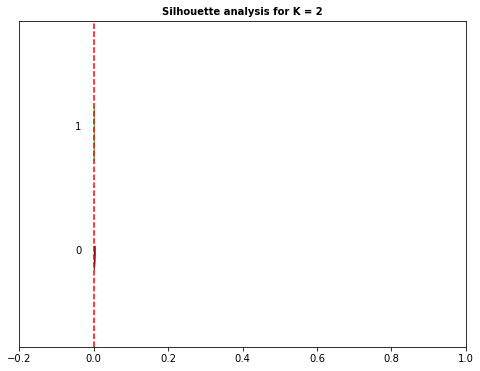

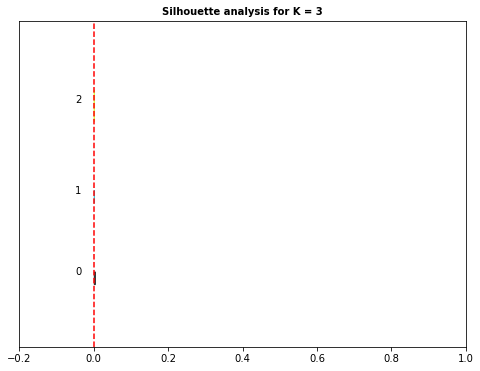

In [59]:
silhouette(kmeans_results, final_df, plot=True)

In [60]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

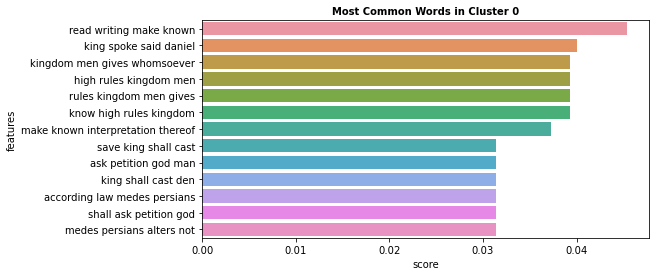

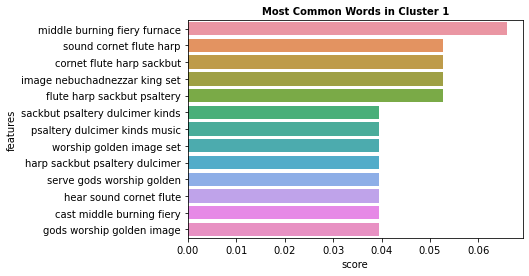

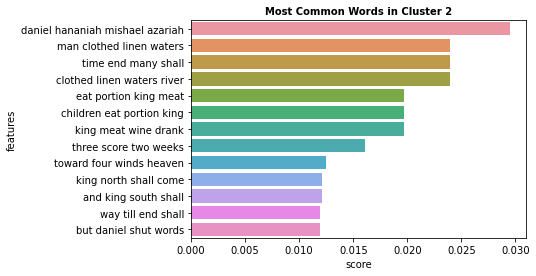

In [61]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [62]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

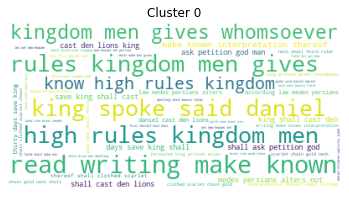

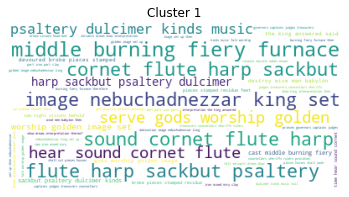

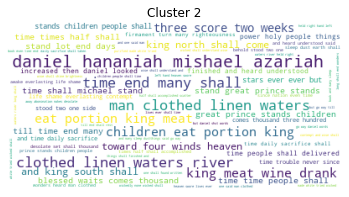

In [63]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [64]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Daniel_1,"'third', 'year', 'reign', 'jehoiakim', 'king',...",2
101,Daniel_2,"'second', 'year', 'reign', 'nebuchadnezzar', '...",1
102,Daniel_3,"'nebuchadnezzar', 'king', 'made', 'image', 'go...",1
103,Daniel_4,"'nebuchadnezzar', 'king', ',', 'people', ',', ...",0
104,Daniel_5,"'belshazzar', 'king', 'made', 'great', 'feast'...",0


In [65]:
print(df)

         Autor                                              Livro  label
100   Daniel_1  'third', 'year', 'reign', 'jehoiakim', 'king',...      2
101   Daniel_2  'second', 'year', 'reign', 'nebuchadnezzar', '...      1
102   Daniel_3  'nebuchadnezzar', 'king', 'made', 'image', 'go...      1
103   Daniel_4  'nebuchadnezzar', 'king', ',', 'people', ',', ...      0
104   Daniel_5  'belshazzar', 'king', 'made', 'great', 'feast'...      0
105   Daniel_6  'pleased', 'darius', 'set', 'kingdom', 'hundre...      0
106   Daniel_7  'first', 'year', 'belshazzar', 'king', 'babylo...      1
107   Daniel_8  'third', 'year', 'reign', 'king', 'belshazzar'...      2
108   Daniel_9  'first', 'year', 'darius', 'son', 'ahasuerus',...      2
109  Daniel_10  'third', 'year', 'cyrus', 'king', 'persia', 't...      2
110  Daniel_11  'also', 'first', 'year', 'darius', 'mede', ','...      2
111  Daniel_12  'time', 'shall', 'michael', 'stand', ',', 'gre...      2


## Análise dos resultados dos agrupamentos 


A análise dessa simulação mostra que na classe 2 os capitulos agrupados são os capitulos de Daniel que tem ligação com a natureza das batlhas entre esses governos gentilicos (isso fica claro com a referencia ao capitulo 8 e 9 que mostra as batlhas dos imperios) no caso do capitulo 9 a batalha do ultimo monarca "anticristo" com o Cristo verdadeiro. 

Outro detalhe é que na classe 2 é possivel ver que ela agrupa os capitulos que competem a visão que o profeta teve em distinção com a visão/sonho de outros individuos como no caso de nabucodonosor. 

A análise da classe 1 mostra que os capitulos agrupados são aqueles que tem ligação com os monarcas em si do periodo do profeta, ou seja, com a adoração que era exigida aos monarcas da epoca e a supremacia de Deus derrubando essa soberba dos monarcas na epoca. com exceção do capitulo 3 que foi classificado com a classe 3 o isolando da classe 1. 

A análise da classe 0 os grupos lá gerados diz respeito a natureza dos quatro imperios como tambem as batlhas que haverão entre os reinos até o estabelecimento do ultimo monorca "anticristo" como tambem dos quatro imperios. 


Classe 1 (Daniel 2, Daniel 4, Daniel 5, Daniel 6)

Classe 2 (Daniel 1, Daniel 8, Daniel 9, Daniel 10, Daniel 12)

Classe 3 (Daniel 3). 

Classe 0 (Daniel 7 e 11) 

Experimento com quatro grupos e trigrams. 

########################################################################################################################

A Análise desse agrupamento mostra que classe 0 agrupa os capitulos que falam sobre o exilio de Daniel e a visão da natureza dos imperios (animais) e como que essa visão é para o tempo do fim. 

A Análise da classe 3 mostra a revelação da estatua que prefigura os quatro imperios mundiais contra o reino de Deus e a soberba de nabucodonosor em lenvantar uma estatua a sua propria adoração. 

A Análise da classe 1 mostra os capitulos que ilsutram a relação entre a soberba dos imperadores do periodo do profeta Daniel, impondo a auto-adoração. 

A Análise da classe 2 mostra o conflito que haverá entre os imperios na conquista do poder mundial. 

Classe 0 (Daniel 1, 7, 9, 10, 12) 

Classe 1 (Daniel 4, 5, 6) 

Classe 2 (Daniel 8, 11)

Classe 3 (Daniel 2, 3)

Agrupamento feito com 4 grupos e quadrigrams. 

#######################################################################################################################

A Análise desse agrupamento mostra a relação da classe 2 com os capitulos que apresentam o exilio de Daniel; batalha entre os imperios, a grande tribulação e que a revelação seria explicada para Daniel como tambem seria para o tempo do fim (escatologia) 

A Análise desse agrupamento mostra a relação da classe 1 da estatua que representa os imperios como os capitulos que falam da auto-adoração que constitui a natureza desses imperios. 

A Análise desse agrupamento mostra a relação da classe 0  com a auto-adoração, a natureza dos imperios (animais) e a guerra entre imperios. 

Classe 0 (Daniel 3, 7, 11) 

Classe 1 (Daniel 2, 4, 5, 6)

Classe 2 (Daniel 1, 8, 9, 10, 12)

Agrupamento feito com 3 grupos e trigrams. 

#######################################################################################################################

A Analise do agrupamento com a classe 2 mostra a a relação dos assuntos: exilio do profeta Daniel, a guerra entre os imperios, a grande tribulação ou (imperio da besta "anticristo") e que a visão é para o tempo do fim. (Escatologia) 

A Análise do agrupamento com a classe 1 mostra a relação da Estatua que representa os 4 imperios mundiais, a natureza do imperio babilonico que é auto-adoração e a natureza desses imperios (animais) 

Análise do agrupamento com a classe 0 mostra a alusão que esses imperios possui a caracteristica intrinseca de auto-adoração e soberba como tentaiva de suplantar o culto ao Deus verdadeiro. (esse agrupamento desses capitulos seriados mostra a relação de que todos esses 4 imperios tem como lema a auto-adoração. 

Classe 0 (Daniel 4, 5, 6) 

Classe 1 (Daniel 2, 3, 7) 

Classe 2 (Daniel 1, 8, 9, 10, 12) 

Agrupamento feito com 3 grupos quadrigrams. 